In [15]:
from subprocess import run

dll_path = 'Lab6_Simulation\\bin\\Debug\\net10.0\\Lab6_Simulation.exe'

initial_age_path = "InitialAge.csv"
death_rules_path = "DeathRules.csv"
results_path = "results.csv"
age_structure_path = "AgeStructure_2021.csv"

print('Starting simulation...')

result = run([str(dll_path), 
    str(initial_age_path),
    str(death_rules_path),
    "1970",
    "2021",
    "130000000"],
    capture_output=True, 
    text=True)

print("STDOUT:")
print(result.stdout)
if result.stderr:
    print("STDERR:")
    print(result.stderr)

print('Simulation finished! Check results.csv')

Starting simulation...
STDOUT:
Year 1970: Births: 2951, Deaths: 11789
Year 1971: Births: 2747, Deaths: 20482
Year 1972: Births: 3176, Deaths: 27675
Year 1973: Births: 3079, Deaths: 33591
Year 1974: Births: 2869, Deaths: 38742
Year 1975: Births: 2447, Deaths: 44830
Year 1976: Births: 2474, Deaths: 49830
Year 1977: Births: 2798, Deaths: 54235
Year 1978: Births: 2727, Deaths: 58119
Year 1979: Births: 2668, Deaths: 61625
Year 1980: Births: 2235, Deaths: 66041
Year 1981: Births: 2131, Deaths: 69892
Year 1982: Births: 2597, Deaths: 73311
Year 1983: Births: 2525, Deaths: 76616
Year 1984: Births: 2476, Deaths: 79648
Year 1985: Births: 2146, Deaths: 83365
Year 1986: Births: 2491, Deaths: 86844
Year 1987: Births: 2344, Deaths: 90084
Year 1988: Births: 2619, Deaths: 93175
Year 1989: Births: 2815, Deaths: 96190
Year 1990: Births: 2914, Deaths: 99810
Year 1991: Births: 3138, Deaths: 103220
Year 1992: Births: 3381, Deaths: 106508
Year 1993: Births: 3650, Deaths: 109712
Year 1994: Births: 3755, Death

In [15]:
%pip install matplotlib

  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)

   ----- ---------------------------------- 1/7 [pillow]
   ----

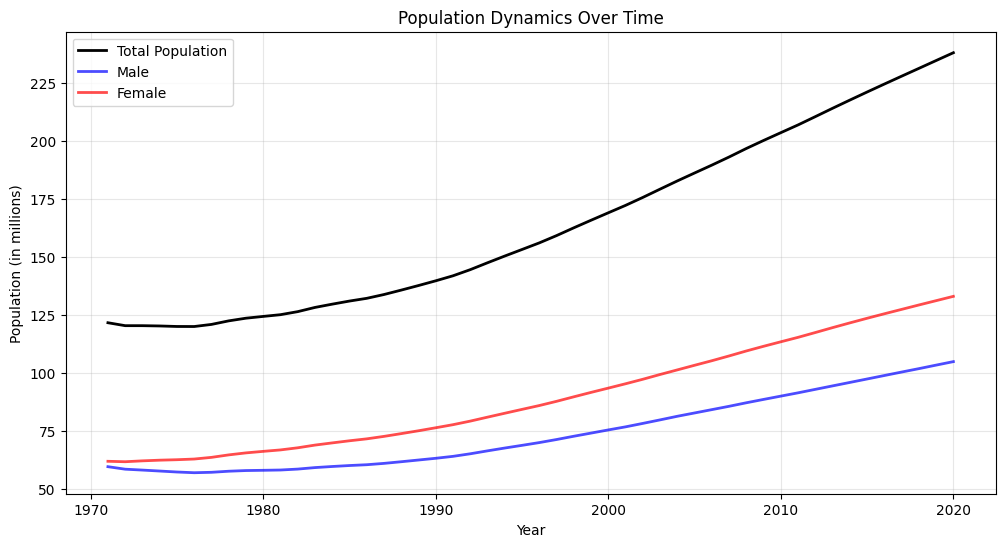

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(results_path)

years = df['Year']
total = df['Total'] / 1000
male = df['Male'] / 1000
female = df['Female'] / 1000

# Простое сглаживание с помощью скользящего среднего
def smooth_data(y, window=3):
    return pd.Series(y).rolling(window=window, center=True).mean()

# Сглаживание
total_smooth = smooth_data(total)
male_smooth = smooth_data(male)
female_smooth = smooth_data(female)

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(years, total_smooth, label='Total Population', linewidth=2, color='black')
plt.plot(years, male_smooth, label='Male', linewidth=2, color='blue', alpha=0.7)
plt.plot(years, female_smooth, label='Female', linewidth=2, color='red', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Population (in millions)')
plt.title('Population Dynamics Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

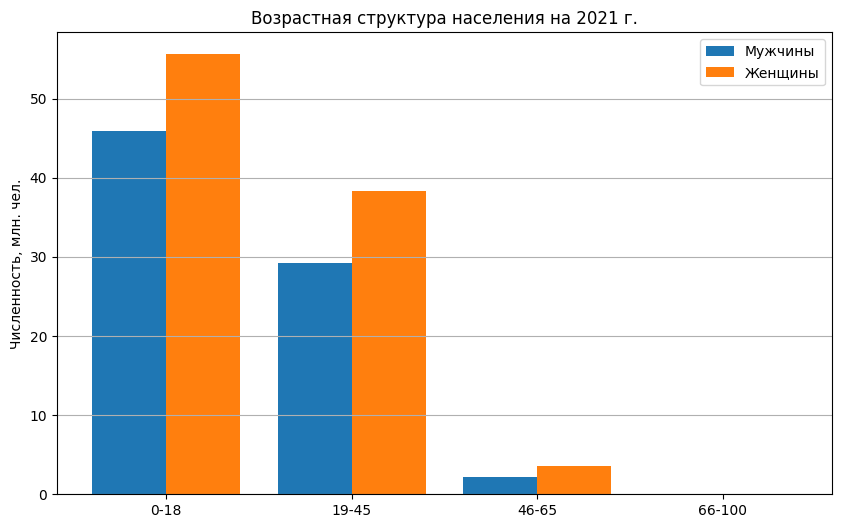

In [10]:
age_df = pd.read_csv(age_structure_path)
groups = age_df['Group']
male_age = age_df['Male']/1000
female_age = age_df['Female']/1000

x = np.arange(len(groups))  # позиции

plt.figure(figsize=(10,6))
plt.bar(x - 0.2, male_age, width=0.4, label="Мужчины")
plt.bar(x + 0.2, female_age, width=0.4, label="Женщины")
plt.xticks(x, groups)
plt.ylabel("Численность, млн. чел.")
plt.title("Возрастная структура населения на 2021 г.")
plt.legend()
plt.grid(axis='y')
plt.show()
